# Анализ эффективности кампаний

## 1. Сравните эффективность различных кампаний с точки зрения генерации лидов и коэффициента конверсии.

In [97]:
import pandas as pd

spend_df = pd.read_pickle("spend_cleaned_v1.pkl")

In [98]:
spend_df

,Date,Source,Campaign,Impressions,Spend,Clicks,AdGroup,Ad
0,2023-07-03,google ads,gen_analyst_de,6,0.00,0,NaN,NaN
1,2023-07-03,google ads,performancemax_eng_de,4,0.01,1,NaN,NaN
5,2023-07-03,facebook ads,03.07.23women,187,3.30,6,women,b3
6,2023-07-03,facebook ads,03.07.23women,4,0.02,1,women,b1
9,2023-07-03,facebook ads,02.07.23wide_de,61,0.58,0,wide,b4
...,...,...,...,...,...,...,...,...
20771,2024-06-21,tiktok ads,22.05.2024wide_de,7,0.03,0,wide,bloggersvideo18com
20772,2024-06-21,youtube ads,youtube_shorts_de,90,0.51,2,com_august,bloggersvideo3june
20774,2024-06-21,facebook ads,17.03.24wide_at,7,0.07,0,wide,bloggersvideo16com_at
20775,2024-06-21,tiktok ads,12.07.2023wide_de,61,0.16,0,wide,bloggersvideo14com


In [99]:
# 1. Сгруппировать показы из Spend по кампании
impressions = spend_df.groupby('Campaign', observed=True)['Impressions'].sum()

In [100]:
spend_df.nunique()

Date            355
Source           14
Campaign         51
Impressions    4003
Spend          2859
Clicks          552
AdGroup          24
Ad              176
dtype: int64

In [101]:
impressions

Campaign
01.02.24wide_webinar_de           18047
01.04.23women_pl                  45956
02.05.24test_de                   20047
02.07.23wide_de                  594807
02.08.23interests_de               5990
03.07.23women                    348089
04.07.23recentlymoved_de         417891
05.07.23interests_de              26833
05.09.2023wide_de                 60420
07.07.23lal_de                   335725
07.12.23test_de                   29759
08.04.24wide_webinar_de          126514
08.06.24wide_webinar_de           20934
09.02.24berlin_dd_de              13993
10.07.23wide_com_de                6978
12.06.24wide_de                    6582
12.07.2023wide_de               3302301
12.09.23interests_uxui_de        319463
14.11.23wide_webinar_de           18128
15.03.2024wide_at                203771
15.03.24recentlymoved_at          14977
15.04.24lal_ab__pl                18887
15.07.23b_de                      54268
15.11.23wide_webinar_de           88077
17.03.24wide_at                

In [102]:
deals_df = pd.read_pickle("deals_cleaned_v3.pkl")

In [103]:
# 2. Посчитать количество лидов из Deals по кампании
leads = deals_df.groupby('Campaign', observed=True)['Id'].nunique()

In [104]:
leads

Campaign
01.04.23women_pl          31
02.05.24test_de          121
02.07.23wide_de          974
02.08.23interests_de       8
03.07.23women            612
                        ... 
work_wr                    6
workingin_de              48
yo_de                     13
youtube_shorts_de       1624
youtube_shortsin_at       14
Name: Id, Length: 152, dtype: int64

In [105]:
contacts_df  = pd.read_pickle("contacts_cleaned_v1.pkl")

In [106]:
contacts_df

,Id,Contact Owner Name,Created Time,Modified Time,Created Date,Created HourMinute
0,5805028000000645014,Rachel White,2023-06-27 11:28:00,2023-12-22 13:34:00,2023-06-27,11:28:00
1,5805028000000872003,Charlie Davis,2023-07-03 11:31:00,2024-05-21 10:23:00,2023-07-03,11:31:00
2,5805028000000889001,Bob Brown,2023-07-02 22:37:00,2023-12-21 13:17:00,2023-07-02,22:37:00
3,5805028000000907006,Bob Brown,2023-07-03 05:44:00,2023-12-29 15:20:00,2023-07-03,05:44:00
4,5805028000000939010,Nina Scott,2023-07-04 10:11:00,2024-04-16 16:14:00,2023-07-04,10:11:00
...,...,...,...,...,...,...
18543,5805028000056889209,Ulysses Adams,2024-06-21 12:11:00,2024-06-21 14:11:00,2024-06-21,12:11:00
18544,5805028000056889351,Eva Kent,2024-06-21 13:32:00,2024-06-21 15:32:00,2024-06-21,13:32:00
18545,5805028000056892018,Eva Kent,2024-06-21 10:21:00,2024-06-21 12:21:00,2024-06-21,10:21:00
18546,5805028000056892055,Yara Edwards,2024-06-21 10:22:00,2024-06-21 12:23:00,2024-06-21,10:22:00


In [107]:
# Очищаем названия для надёжного сравнения
spend_campaigns = set(spend_df['Campaign'].dropna().str.strip().unique())
deal_campaigns = set(deals_df['Campaign'].dropna().str.strip().unique())

# Кампании, которые есть в тратах, и одновременно в сделках
matching_campaigns = spend_campaigns & deal_campaigns
print("Кампаний, которые совпадают по названию:", len(matching_campaigns))

Кампаний, которые совпадают по названию: 45


In [113]:
# Привязка сделок к контактам
deals_with_contacts = deals_df[['Campaign', 'Contact Name']].dropna()

# Считаем число уникальных лидов по каждой кампании
leads_per_campaign = deals_with_contacts.groupby('Campaign', observed=True)['Contact Name'].nunique().reset_index()
leads_per_campaign.columns = ['Campaign', 'Leads']

In [114]:
leads_per_campaign

,Campaign,Leads
0,01.04.23women_pl,31
1,02.05.24test_de,120
2,02.07.23wide_de,942
3,02.08.23interests_de,8
4,03.07.23women,600
...,...,...
145,work_wr,6
146,workingin_de,46
147,yo_de,13
148,youtube_shorts_de,1520


In [121]:
# Суммируем показы по каждой кампании
impressions_per_campaign = spend_df.groupby('Campaign', observed=True, as_index=False)['Impressions'].sum()

# Объединяем лиды и показы
merged_df = impressions_per_campaign.merge(leads_per_campaign, on='Campaign', how='left')
merged_df['Leads'] = merged_df['Leads'].fillna(0)

# Считаем конверсию
merged_df['Conversion Rate (%)'] = merged_df.apply(
    lambda row: (row['Leads'] / row['Impressions'] * 100) if row['Impressions'] > 0 else None,
    axis=1
)

# Сортируем по конверсии
merged_df_sorted = merged_df.sort_values('Conversion Rate (%)', ascending=False)

In [92]:
print(merged_df_sorted.head(10))  # топ-10 кампаний по конверсии

                   Campaign  Impressions  Leads  Conversion Rate (%)
38                   bbo_de         3069  149.0             4.855002
40      brand_search_eng_de         7783  165.0             2.120005
39                 blog2_de        16100  273.0             1.695652
48               web2408_de         9315  143.0             1.535158
2           02.05.24test_de        20047  120.0             0.598593
18  14.11.23wide_webinar_de        18128   99.0             0.546117
12  08.06.24wide_webinar_de        20934  111.0             0.530238
44           gen_analyst_de         8852   35.0             0.395391
22             15.07.23b_de        54268  131.0             0.241395
11  08.04.24wide_webinar_de       126514  278.0             0.219739


In [115]:
merged_df_sorted

,Campaign,Impressions,Leads,Conversion Rate (%)
38,bbo_de,3069,149.0,4.855002
40,brand_search_eng_de,7783,165.0,2.120005
39,blog2_de,16100,273.0,1.695652
48,web2408_de,9315,143.0,1.535158
2,02.05.24test_de,20047,120.0,0.598593
18,14.11.23wide_webinar_de,18128,99.0,0.546117
12,08.06.24wide_webinar_de,20934,111.0,0.530238
44,gen_analyst_de,8852,35.0,0.395391
22,15.07.23b_de,54268,131.0,0.241395
11,08.04.24wide_webinar_de,126514,278.0,0.219739


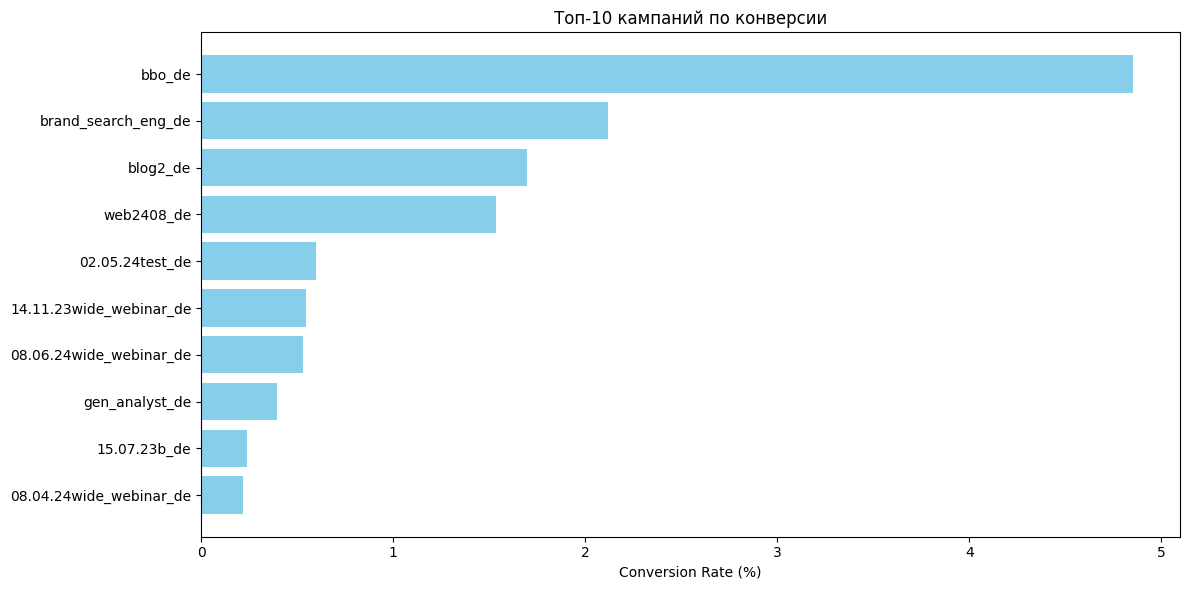

In [93]:
import matplotlib.pyplot as plt

top10 = merged_df_sorted[merged_df_sorted['Conversion Rate (%)'].notna()].head(10)

plt.figure(figsize=(12,6))
plt.barh(top10['Campaign'], top10['Conversion Rate (%)'], color='skyblue')
plt.xlabel('Conversion Rate (%)')
plt.title('Топ-10 кампаний по конверсии')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

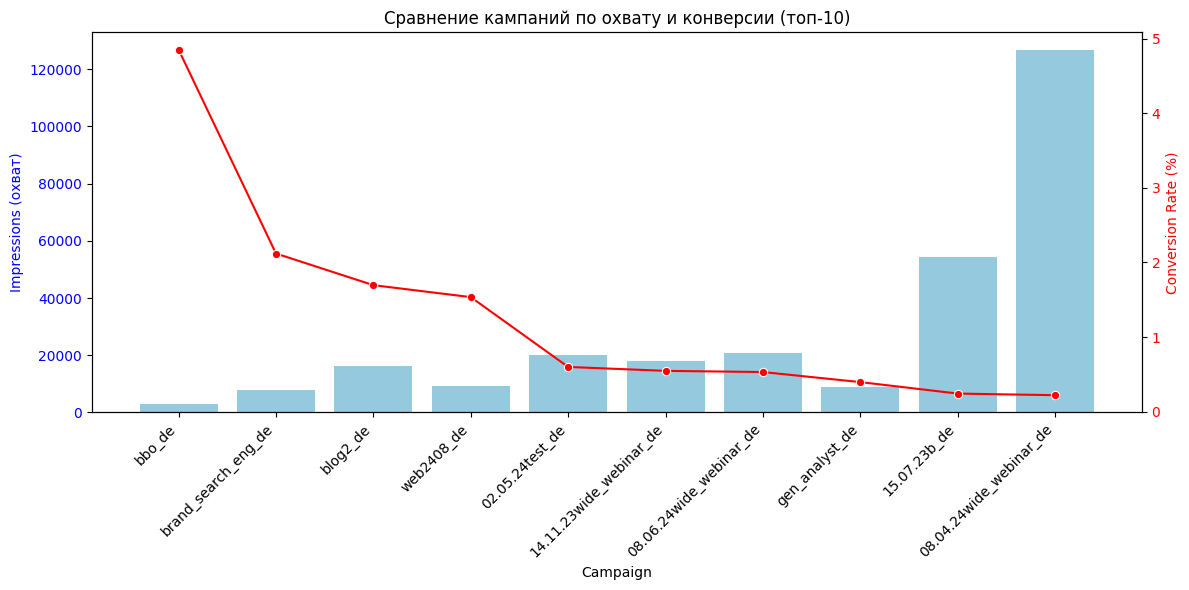

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Отсортируем по охвату (или конверсии) и возьмём топ-10 кампаний для удобства
top_campaigns = merged_df_sorted.sort_values(by='Conversion Rate (%)', ascending=False).head(10).copy()

fig, ax1 = plt.subplots(figsize=(12,6))

# Столбчатая диаграмма для Impressions
sns.barplot(x=top_campaigns['Campaign'], y='Impressions', data=top_campaigns, ax=ax1, color='skyblue')
ax1.set_ylabel('Impressions (охват)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(range(len(top_campaigns)))
ax1.set_xticklabels(top_campaigns['Campaign'], rotation=45, ha='right')

# Создаем вторую ось Y для конверсии
ax2 = ax1.twinx()
sns.lineplot(x=top_campaigns['Campaign'], y='Conversion Rate (%)', data=top_campaigns, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Conversion Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Сравнение кампаний по охвату и конверсии (топ-10)')
plt.tight_layout()
plt.show()

In [122]:
# Фильтруем только успешные сделки
successful_deals_df = deals_df[deals_df['Stage'] == 'Payment Done']
successful_deals_df

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Created Date,Create_to_Close_Days,SLA_range
463,5805028000055502703,Eva Kent,2024-06-18,B - Medium,Payment Done,NaN,/pl-eng/web-developer,performancemax_wide_at,0 days 14:35:20,_{region_name}_,...,11,1,500.0,4500.0,5805028000055471387,Podskalie,NaN,2024-06-15,3.0,Very slow (>60 min)
473,5805028000055524315,Ben Hall,2024-06-19,A - High,Payment Done,NaN,/eng,12.07.2023wide_de,0 days 00:17:25,bloggersvideo11,...,11,1,500.0,4500.0,5805028000055503302,Zinnowitz,NaN,2024-06-15,4.0,Medium (15-30 min)
491,5805028000055524040,Ben Hall,2024-06-23,B - Medium,Payment Done,NaN,/eng,live_de,0 days 00:23:42,b0,...,6,1,1000.0,9000.0,5805028000055464156,Wolfsburg,B1,2024-06-15,8.0,Medium (15-30 min)
824,5805028000054664018,Ben Hall,2024-06-19,D - Non Target,Payment Done,NaN,/eng,NaN,0 days 16:31:52,NaN,...,6,1,1000.0,9000.0,5805028000054683001,Zwickau,A2,2024-06-11,8.0,Very slow (>60 min)
1029,5805028000054257317,Quincy Vincent,2024-06-17,B - Medium,Payment Done,NaN,/eng,02.07.23wide_de,0 days 00:45:55,bloggersvideo16com,...,11,1,1000.0,11000.0,5805028000054284461,Leinfelden-Echterdingen,B1,2024-06-10,7.0,Slow (30-60 min)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21034,5805028000002302112,Julia Nelson,2023-07-19,C - Low,Payment Done,Expensive,eng/digital-marketing,performancemax_digitalmarkt_ru_de,0 days 15:24:52,_{region_name}_,...,6,2,1000.0,5000.0,5805028000002302109,Wolfsburg,B1,2023-07-18,1.0,Very slow (>60 min)
21087,5805028000001987082,Julia Nelson,2023-07-17,C - Low,Payment Done,Conditions are not suitable,eng/digital-marketing,12.07.2023wide_de,0 days 00:49:16,v3com,...,11,11,1000.0,11000.0,5805028000001986077,NaN,B1,2023-07-17,0.0,Slow (30-60 min)
21130,5805028000001885076,Jane Smith,2023-08-31,A - High,Payment Done,NaN,eng/digital-marketing,04.07.23recentlymoved_de,0 days 00:13:31,b2,...,11,11,450.0,4000.0,5805028000001880249,Ingolstadt,NaN,2023-07-15,47.0,Fast (5-15 min)
21265,5805028000001401001,Oliver Taylor,2023-07-16,B - Medium,Payment Done,NaN,eng/digital-marketing,02.07.23wide_de,0 days 02:22:36,b3,...,11,8,1000.0,11500.0,5805028000001350049,NaN,NaN,2023-07-08,8.0,Very slow (>60 min)


In [123]:
# Очищаем названия для надёжного сравнения
spend_campaigns = set(spend_df['Campaign'].dropna().str.strip().unique())
successful_deal_campaigns = set(successful_deals_df['Campaign'].dropna().str.strip().unique())

# Кампании, которые есть в тратах, и одновременно в сделках
s_matching_campaigns = spend_campaigns & successful_deal_campaigns
print("Кампаний, которые совпадают по названию:", len(s_matching_campaigns))

# Привязка сделок к контактам
s_deals_with_contacts = successful_deals_df[['Campaign', 'Contact Name']].dropna()

# Считаем число уникальных лидов по каждой кампании
s_leads_per_campaign = s_deals_with_contacts.groupby('Campaign', observed=True)['Contact Name'].nunique().reset_index()
s_leads_per_campaign.columns = ['Campaign', 'Leads']

# Суммируем показы по каждой кампании
s_impressions_per_campaign = spend_df.groupby('Campaign', observed=True, as_index=False)['Impressions'].sum()

# Объединяем лиды и показы
s_merged_df = s_impressions_per_campaign.merge(s_leads_per_campaign, on='Campaign', how='left')
s_merged_df['Leads'] = s_merged_df['Leads'].fillna(0)

# Считаем конверсию
s_merged_df['Conversion Rate (%)'] = s_merged_df.apply(
    lambda s_row: (s_row['Leads'] / s_row['Impressions'] * 100) if s_row['Impressions'] > 0 else None,
    axis=1
)

# Сортируем по конверсии
s_merged_df_sorted = s_merged_df.sort_values('Conversion Rate (%)', ascending=False)

Кампаний, которые совпадают по названию: 27


In [129]:
s_merged_df_sorted.head(10)

,Campaign,Impressions,Leads,Conversion Rate (%)
40,brand_search_eng_de,7783,15.0,0.192728
48,web2408_de,9315,6.0,0.064412
39,blog2_de,16100,6.0,0.037267
44,gen_analyst_de,8852,3.0,0.033891
33,20.05.24wide_de,5870,1.0,0.017036
22,15.07.23b_de,54268,6.0,0.011056
25,18.10.23wide_gos_de,22146,2.0,0.009031
5,03.07.23women,348089,31.0,0.008906
3,02.07.23wide_de,594807,51.0,0.008574
17,12.09.23interests_uxui_de,319463,27.0,0.008452


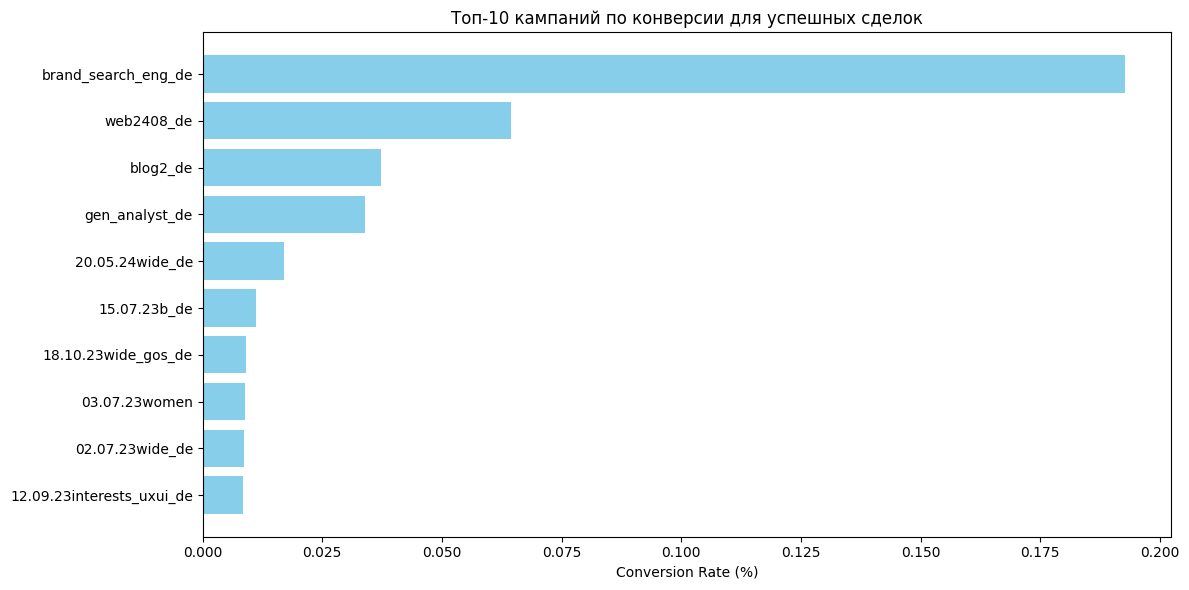

In [125]:
import matplotlib.pyplot as plt

s_top10 = s_merged_df_sorted[s_merged_df_sorted['Conversion Rate (%)'].notna()].head(10)

plt.figure(figsize=(12,6))
plt.barh(s_top10['Campaign'], s_top10['Conversion Rate (%)'], color='skyblue')
plt.xlabel('Conversion Rate (%)')
plt.title('Топ-10 кампаний по конверсии для успешных сделок')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

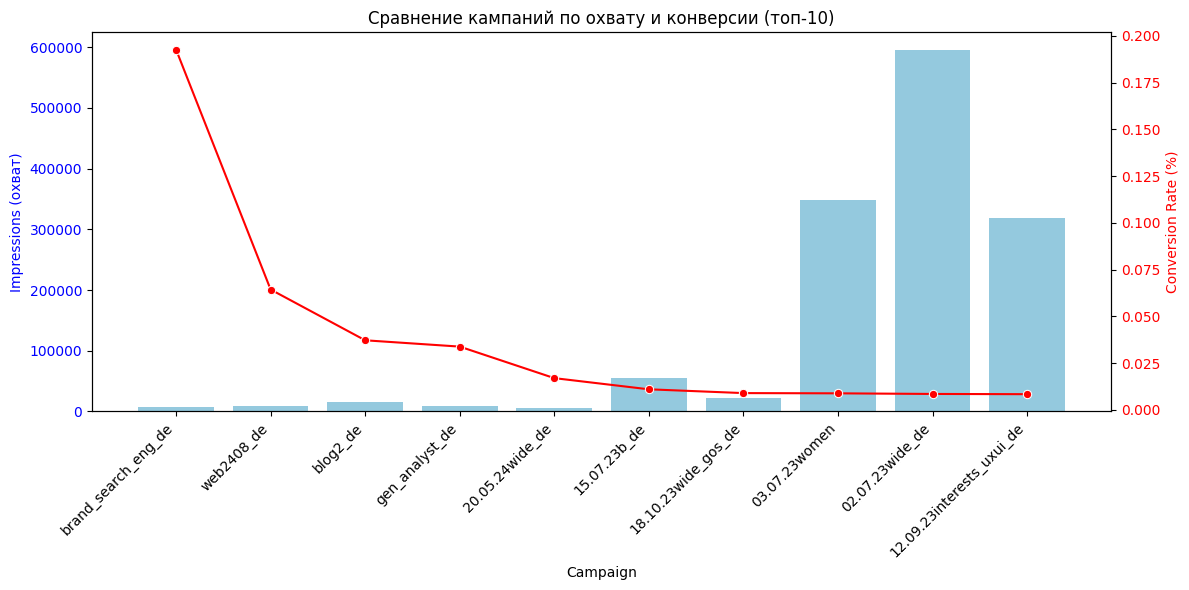

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Отсортируем по охвату (или конверсии) и возьмём топ-10 кампаний для удобства
s_top_campaigns = s_merged_df_sorted.sort_values(by='Conversion Rate (%)', ascending=False).head(10).copy()

fig, ax1 = plt.subplots(figsize=(12,6))

# Столбчатая диаграмма для Impressions
sns.barplot(x=s_top_campaigns['Campaign'], y='Impressions', data=s_top_campaigns, ax=ax1, color='skyblue')
ax1.set_ylabel('Impressions (охват)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(range(len(s_top_campaigns)))
ax1.set_xticklabels(s_top_campaigns['Campaign'], rotation=45, ha='right')

# Создаем вторую ось Y для конверсии
ax2 = ax1.twinx()
sns.lineplot(x=s_top_campaigns['Campaign'], y='Conversion Rate (%)', data=s_top_campaigns, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Conversion Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Сравнение кампаний по охвату и конверсии (топ-10)')
plt.tight_layout()
plt.show()

In [130]:
contacts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18548 entries, 0 to 18547
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  18548 non-null  object        
 1   Contact Owner Name  18548 non-null  object        
 2   Created Time        18548 non-null  datetime64[ns]
 3   Modified Time       18548 non-null  datetime64[ns]
 4   Created Date        18548 non-null  datetime64[ns]
 5   Created HourMinute  18548 non-null  object        
dtypes: datetime64[ns](3), object(3)
memory usage: 869.6+ KB


In [131]:
# Предположим, что в deals_df есть поля 'Contact Name' и 'Campaign'
contacts_with_campaign = contacts_df.merge(
    deals_df[['Contact Name', 'Campaign']],
    left_on='Id',
    right_on='Contact Name',
    how='left'
)

contacts_per_campaign = contacts_with_campaign.groupby('Campaign')['Id'].nunique().reset_index()
contacts_per_campaign.columns = ['Campaign', 'Contacts Count']

C:\Users\user\AppData\Local\Temp\ipykernel_18988\878803487.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contacts_per_campaign = contacts_with_campaign.groupby('Campaign')['Id'].nunique().reset_index()


In [153]:
contacts_per_campaign = contacts_per_campaign.sort_values(by='Contacts Count', ascending=False)

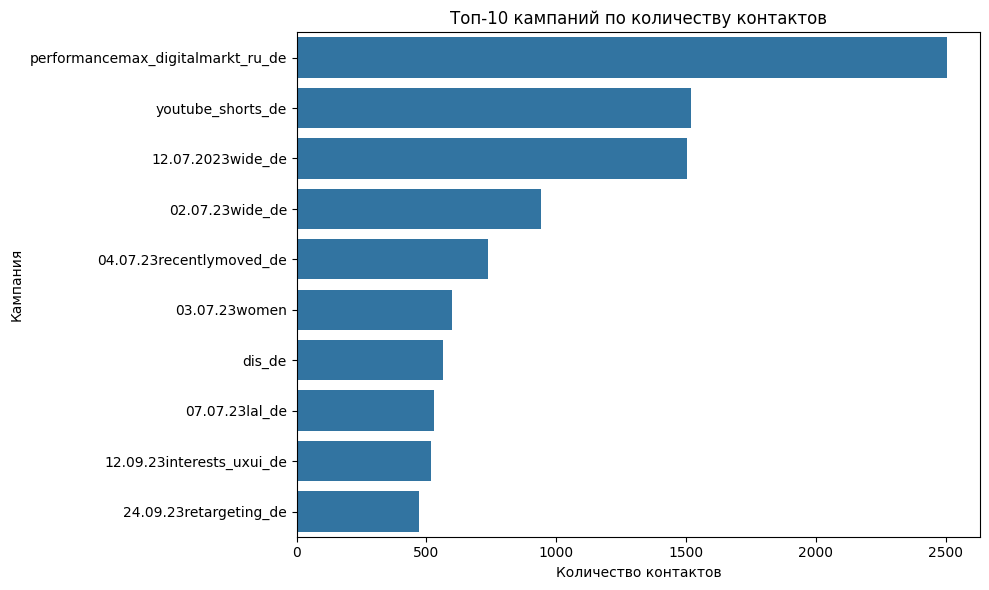

In [174]:
# Удалим строки с NaN в Campaign
filtered_df = contacts_per_campaign.dropna(subset=['Campaign'])

# Сортируем и берём топ-10
top_10_campaigns = filtered_df.sort_values(by='Contacts Count', ascending=False).head(10).copy()

# Сортируем по возрастанию для отображения на графике
top_10_campaigns = top_10_campaigns.sort_values(by='Contacts Count', ascending=False)

# Сброс категориального типа, чтобы избавиться от "лишних" категорий
top_10_campaigns['Campaign'] = top_10_campaigns['Campaign'].astype(str)

# Назначаем новый категориальный тип с нужным порядком
top_10_campaigns['Campaign'] = pd.Categorical(
    top_10_campaigns['Campaign'],
    categories=top_10_campaigns['Campaign'],  # порядок из отсортированных строк
    ordered=True
)

# Рисуем график
plt.figure(figsize=(10, 6))
sns.barplot(x='Contacts Count', y='Campaign', data=top_10_campaigns)
plt.title('Топ-10 кампаний по количеству контактов')
plt.xlabel('Количество контактов')
plt.ylabel('Кампания')
plt.tight_layout()
plt.show()

In [137]:
# Сначала объединяем по контакту
deals_with_contacts = deals_df.merge(
    contacts_df[['Id', 'Created Date']],
    left_on='Contact Name',
    right_on='Id',
    how='left'
)

In [138]:
deals_with_contacts

,Id_x,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Created Date_x,Create_to_Close_Days,SLA_range,Id_y,Created Date_y
0,5805028000056864695,Ben Hall,NaT,B - Medium,New Lead,NaN,/eng/test,03.07.23women,NaT,v16,...,NaN,NaN,5805028000056849495,NaN,NaN,2024-06-21,NaN,NaN,5805028000056849495,2024-06-21
1,5805028000056859489,Ulysses Adams,NaT,B - Medium,New Lead,NaN,/at-eng,NaN,NaT,NaN,...,0.0,2000.0,5805028000056834471,NaN,NaN,2024-06-21,NaN,NaN,5805028000056834471,2024-06-21
2,5805028000056832357,Ulysses Adams,2024-06-21,D - Non Target,Lost,Non target,/at-eng,engwien_at,0 days 00:26:43,b1-at,...,NaN,NaN,5805028000056854421,NaN,NaN,2024-06-21,0.0,Medium (15-30 min),5805028000056854421,2024-06-21
3,5805028000056824246,Eva Kent,2024-06-21,E - Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_de,0 days 01:00:04,bloggersvideo14com,...,NaN,NaN,5805028000056889351,NaN,NaN,2024-06-21,0.0,Very slow (>60 min),5805028000056889351,2024-06-21
4,5805028000056873292,Ben Hall,2024-06-21,D - Non Target,Lost,Non target,/eng,discovery_de,0 days 00:53:12,website,...,NaN,NaN,5805028000056876176,NaN,NaN,2024-06-21,0.0,Slow (30-60 min),5805028000056876176,2024-06-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21406,5805028000050001603,Quincy Vincent,2024-05-15,E - Non Qualified,Lost,Duplicate,/eng/test,NaN,0 days 05:35:41,NaN,...,NaN,NaN,5805028000049855125,NaN,NaN,2024-05-15,0.0,Very slow (>60 min),5805028000049855125,2024-05-14
21407,5805028000053787195,Paula Underwood,2024-06-06,E - Non Qualified,Lost,Duplicate,/eng/test,NaN,NaT,NaN,...,NaN,NaN,5805028000053705642,NaN,NaN,2024-06-06,0.0,NaN,5805028000053705642,2024-06-06
21408,5805028000054823001,Quincy Vincent,2024-06-12,E - Non Qualified,Lost,Duplicate,/eng,brand_search_eng_de,0 days 04:30:17,152789402780_{region_name}_668024583824,...,NaN,NaN,5805028000054480760,NaN,NaN,2024-06-12,0.0,Very slow (>60 min),5805028000054480760,2024-06-11
21409,5805028000056685164,Charlie Davis,2024-06-20,E - Non Qualified,Lost,Duplicate,/eng/test,NaN,0 days 00:01:46,NaN,...,NaN,NaN,5805028000056392363,NaN,NaN,2024-06-20,0.0,Very fast (≤5 min),5805028000056392363,2024-06-19


In [142]:
unique_contacts_in_deals = deals_with_contacts['Contact Name'].nunique()
print("Уникальных контактов, участвовавших в сделках:", unique_contacts_in_deals)

Уникальных контактов, участвовавших в сделках: 18089


In [176]:
# Проверим имена колонок после объединения
print(deals_with_contacts.columns)

# Допустим, после объединения колонка с ID контакта называется 'Id_y'
# (или переименуем её сами при объединении, чтобы было понятнее)
deals_with_contacts = deals_df.merge(
    contacts_df[['Id', 'Created Date']],
    left_on='Contact Name',
    right_on='Id',
    how='left'
).rename(columns={'Id_y': 'Contact Id'})  # Переименуем колонку Id из contacts_df

# Теперь используем 'Contact Id'
total_contacts = contacts_df['Id'].nunique()
total_deals = deals_with_contacts['Contact Name'].nunique()
successful_deals = deals_with_contacts[deals_with_contacts['Stage'] == 'Payment Done']['Contact Id'].nunique()

# Строим воронку
funnel = pd.DataFrame({
    'Stage': ['Contacts', 'Deals', 'Successful Deals'],
    'Count': [total_contacts, total_deals, successful_deals]
})


Index(['Id_x', 'Deal Owner Name', 'Closing Date', 'Quality', 'Stage',
       'Lost Reason', 'Page', 'Campaign', 'SLA', 'Content', 'Term', 'Source',
       'Payment Type', 'Product', 'Education Type', 'Created Time',
       'Course duration', 'Months of study', 'Initial Amount Paid',
       'Offer Total Amount', 'Contact Name', 'City', 'Level of Deutsch',
       'Created Date_x', 'Create_to_Close_Days', 'SLA_range', 'Contact Id',
       'Created Date_y'],
      dtype='object')


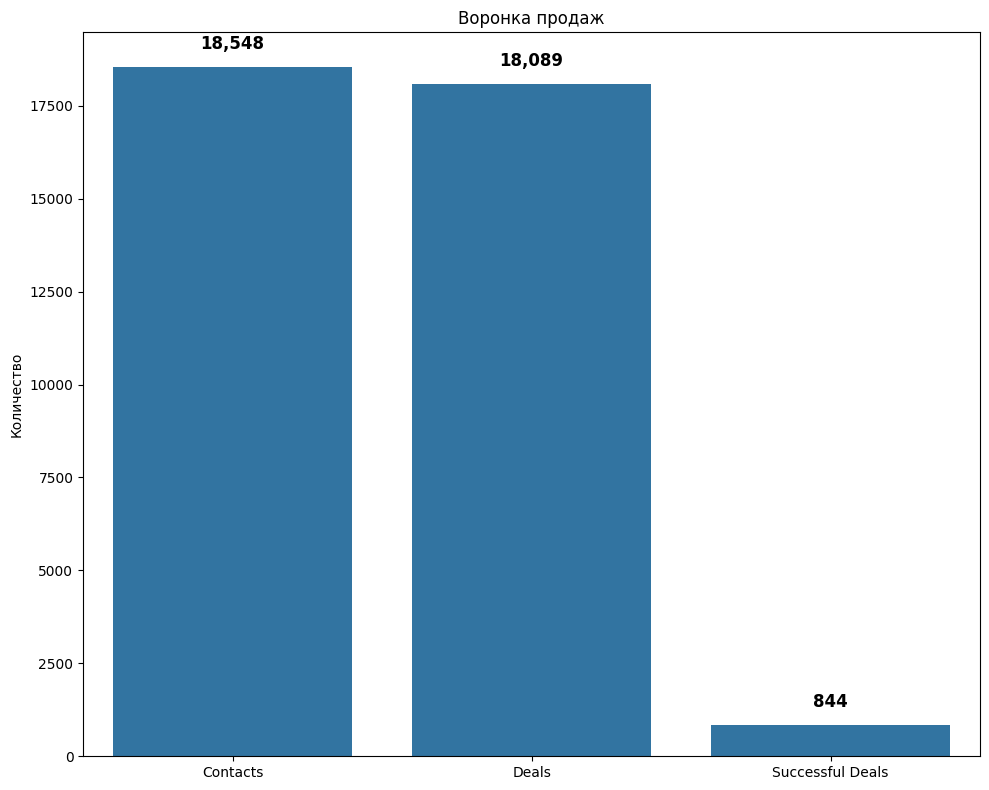

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Строим график
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Stage', y='Count', data=funnel)

# Добавим подписи на столбцы
for i, row in funnel.iterrows():
    ax.text(i, row['Count'] + max(funnel['Count']) * 0.02,  # немного выше столбца
            f"{row['Count']:,}",  # число с разделителем тысяч
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Воронка продаж')
plt.ylabel('Количество')
plt.xlabel('')
plt.tight_layout()
plt.show()

## 2. Оцените эффективность различных маркетинговых источников (Source) в генерировании качественных лидов.

In [186]:
# Считаем общее количество сделок по каждому источнику
total_deals = deals_df.groupby('Source').agg(total_deals=('Id', 'count'))

# Считаем количество успешных сделок по каждому источнику
successful_deals = successful_deals_df.groupby('Source').agg(successful_deals=('Id', 'count'))

# Объединяем оба датафрейма по источнику
source_stats = total_deals.join(successful_deals, how='left').fillna(0)

# Добавляем конверсию
source_stats['conversion_rate'] = (source_stats['successful_deals'] / source_stats['total_deals']) * 100

# Преобразуем успешные сделки к целому типу (после fillna получаются float)
source_stats['successful_deals'] = source_stats['successful_deals'].astype(int)

# Убираем источники с нулевыми сделками (если такие вдруг есть)
source_stats = source_stats[source_stats['total_deals'] > 0]

print(source_stats)

                total_deals  successful_deals  conversion_rate
Source                                                        
bloggers               1087                39         3.587856
crm                    1628                24         1.474201
facebook ads           4843               202         4.170968
google ads             4197               173         4.121992
offline                   2                 0         0.000000
organic                2504               147         5.870607
partnership             203                 4         1.970443
smm                    1727                91         5.269253
telegram posts         1001                40         3.996004
test                    158                 3         1.898734
tiktok ads             2046                56         2.737048
webinar                 368                26         7.065217
youtube ads            1647                53         3.217972


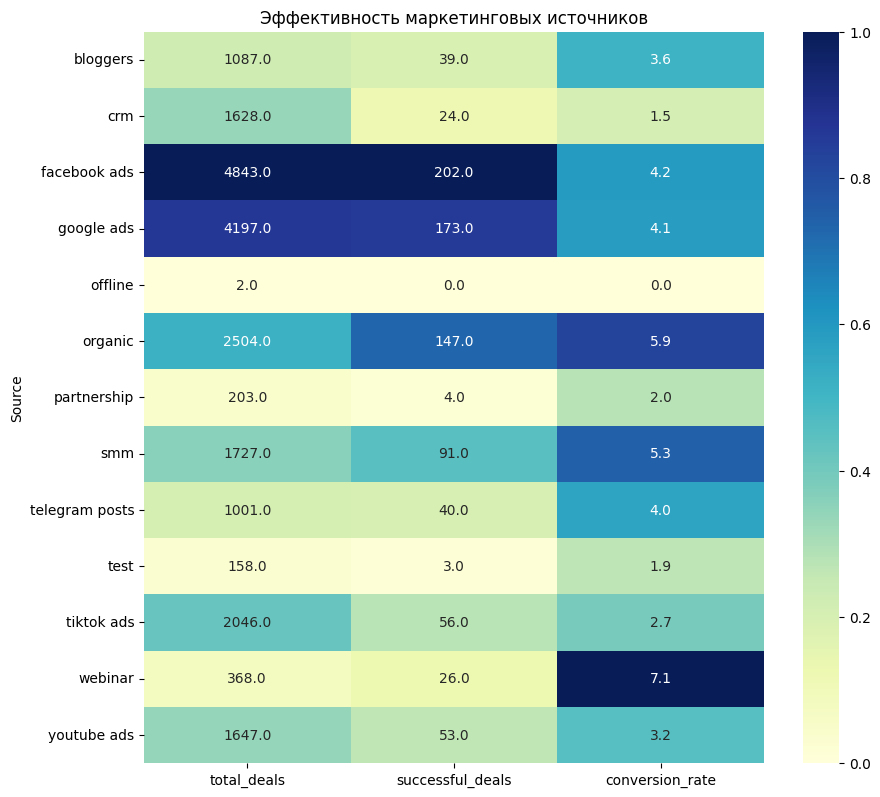

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

# Выбираем метрики для тепловой карты
heatmap_data = source_stats[['total_deals', 'successful_deals', 'conversion_rate']]

# Нормируем значения для более наглядного сравнения (если нужно)
heatmap_norm = heatmap_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

plt.figure(figsize=(10, len(heatmap_data) * 0.5 + 3))
sns.heatmap(heatmap_norm, annot=heatmap_data.round(1), fmt='', cmap='YlGnBu')
plt.title('Эффективность маркетинговых источников')
plt.ylabel('Source')
plt.show()

In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Кол-во уникальных лидов (контактов) по источнику из deals_df
leads_per_source = deals_df.groupby('Source')['Contact Name'].nunique().rename('Leads')

# Кол-во сделок по источникам
deals_per_source = deals_df.groupby('Source')['Id'].count().rename('Deals')

# Кол-во успешных сделок (Payment Done) по источникам
successful_deals_per_source = deals_df[deals_df['Stage'] == 'Payment Done'].groupby('Source')['Id'].count().rename('Successful Deals')

# Объединяем
funnel_df = pd.concat([leads_per_source, deals_per_source, successful_deals_per_source], axis=1).fillna(0)

# Приводим к целым числам и сбрасываем индекс
funnel_df = funnel_df.astype(int).reset_index()


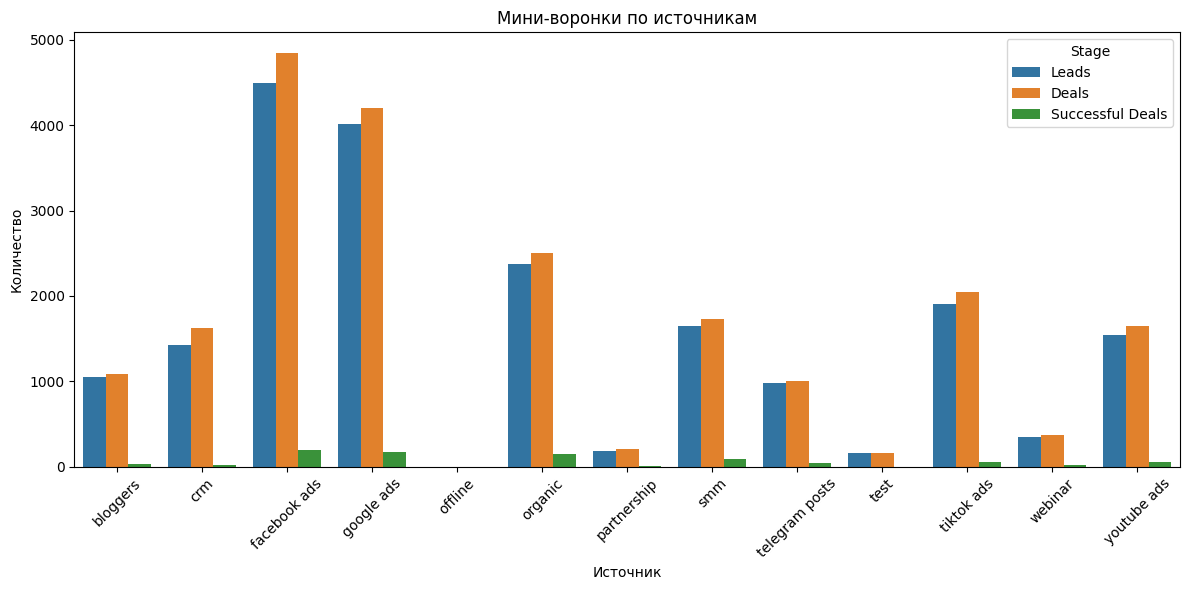

In [190]:
# Для визуализации преобразуем в длинный формат
funnel_df_melted = funnel_df.melt(id_vars='Source', var_name='Stage', value_name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(data=funnel_df_melted, x='Source', y='Count', hue='Stage')
plt.title('Мини-воронки по источникам')
plt.xticks(rotation=45)
plt.xlabel('Источник')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()

In [191]:
# Кол-во уникальных лидов (контактов) по источнику из deals_df
leads_per_source = deals_df.groupby('Source')['Contact Name'].nunique().rename('Leads')

# Кол-во сделок по источникам
deals_per_source = deals_df.groupby('Source')['Id'].count().rename('Deals')

# Кол-во успешных сделок (Payment Done) по источникам
successful_deals_per_source = deals_df[deals_df['Stage'] == 'Payment Done'].groupby('Source')['Id'].count().rename('Successful Deals')

# Объединяем
funnel_df = pd.concat([leads_per_source, deals_per_source, successful_deals_per_source], axis=1).fillna(0)

# Приводим к целым числам
funnel_df = funnel_df.astype(int)

# Считаем конверсии в процентах
funnel_df['Conversion Lead→Deal %'] = (funnel_df['Deals'] / funnel_df['Leads'] * 100).round(2)
funnel_df['Conversion Deal→Payment %'] = (funnel_df['Successful Deals'] / funnel_df['Deals'] * 100).round(2)

# Сброс индекса для удобства
funnel_df = funnel_df.reset_index()

print(funnel_df)

            Source  Leads  Deals  Successful Deals  Conversion Lead→Deal %  \
0         bloggers   1053   1087                39                  103.23   
1              crm   1430   1628                24                  113.85   
2     facebook ads   4488   4843               202                  107.91   
3       google ads   4010   4197               173                  104.66   
4          offline      2      2                 0                  100.00   
5          organic   2379   2504               147                  105.25   
6      partnership    185    203                 4                  109.73   
7              smm   1653   1727                91                  104.48   
8   telegram posts    986   1001                40                  101.52   
9             test    157    158                 3                  100.64   
10      tiktok ads   1909   2046                56                  107.18   
11         webinar    348    368                26              

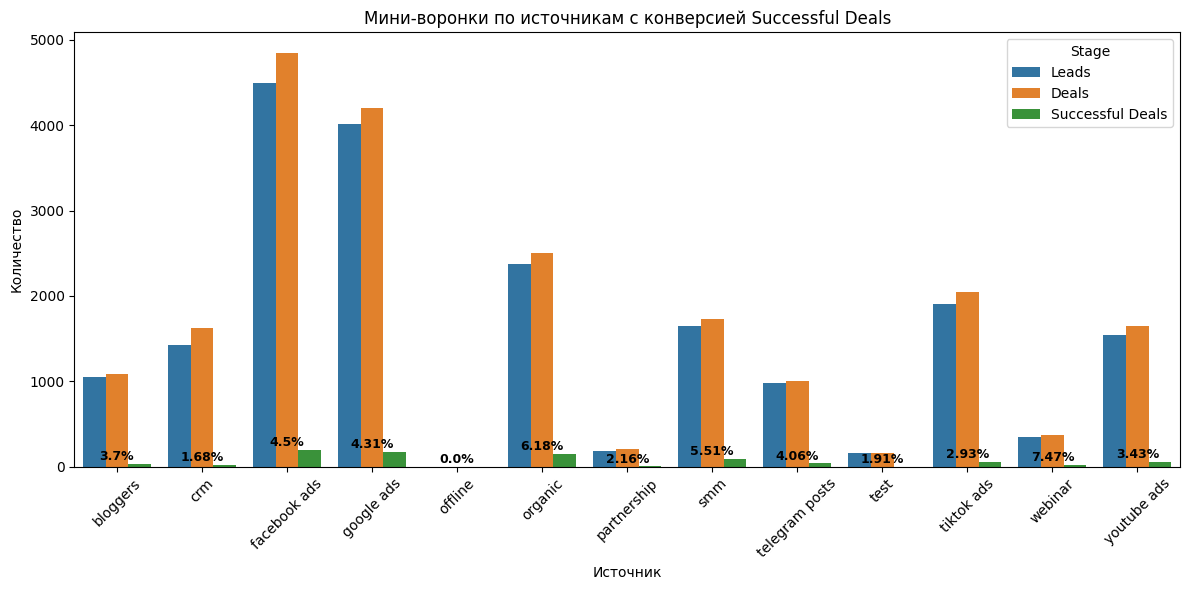

In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Кол-во уникальных лидов (контактов) по источнику из deals_df
leads_per_source = deals_df.groupby('Source')['Contact Name'].nunique().rename('Leads')

# Кол-во сделок по источникам
deals_per_source = deals_df.groupby('Source')['Id'].count().rename('Deals')

# Кол-во успешных сделок (Payment Done) по источникам
successful_deals_per_source = deals_df[deals_df['Stage'] == 'Payment Done'].groupby('Source')['Id'].count().rename('Successful Deals')

# Объединяем
funnel_df = pd.concat([leads_per_source, deals_per_source, successful_deals_per_source], axis=1).fillna(0)

# Конверсия Successful Deals / Leads в процентах
funnel_df['Conversion (%)'] = (funnel_df['Successful Deals'] / funnel_df['Leads'] * 100).round(2)

# Приводим к целым числам и сбрасываем индекс
funnel_df = funnel_df.astype({'Leads': int, 'Deals': int, 'Successful Deals': int}).reset_index()

# Для визуализации преобразуем в длинный формат
funnel_df_melted = funnel_df.melt(id_vars=['Source', 'Conversion (%)'], var_name='Stage', value_name='Count')

plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=funnel_df_melted, x='Source', y='Count', hue='Stage')

# Добавляем подписи с конверсией над столбцами Successful Deals
for i, row in funnel_df.iterrows():
    # Находим координаты столбца Successful Deals для данного источника
    # Поскольку barplot группирует по 'Stage', найдем высоту столбца Successful Deals
    x = i
    y = row['Successful Deals']
    conv = row['Conversion (%)']
    # Подпись с конверсией чуть выше столбца
    barplot.text(x, y + max(funnel_df['Leads']) * 0.01, f'{conv}%', ha='center', color='black', fontsize=9, fontweight='bold')

plt.title('Мини-воронки по источникам с конверсией Successful Deals')
plt.xticks(rotation=45)
plt.xlabel('Источник')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()

In [194]:
# Фильтруем успешные сделки
successful_deals = deals_df[deals_df['Stage'] == 'Payment Done']

# Средний чек по источникам
avg_check_per_source = successful_deals.groupby('Source')['Initial Amount Paid'].mean().reset_index()

# Для наглядности — можно отсортировать по среднему чеку
avg_check_per_source = avg_check_per_source.sort_values(by='Initial Amount Paid', ascending=False)

print(avg_check_per_source)

            Source  Initial Amount Paid
10         webinar          2121.153846
4          organic          1256.513699
2     facebook ads          1198.730964
9       tiktok ads          1190.178571
11     youtube ads          1187.735849
7   telegram posts          1165.384615
6              smm          1133.522727
3       google ads          1034.615385
0         bloggers           848.717949
5      partnership           837.500000
8             test           733.333333
1              crm           678.260870


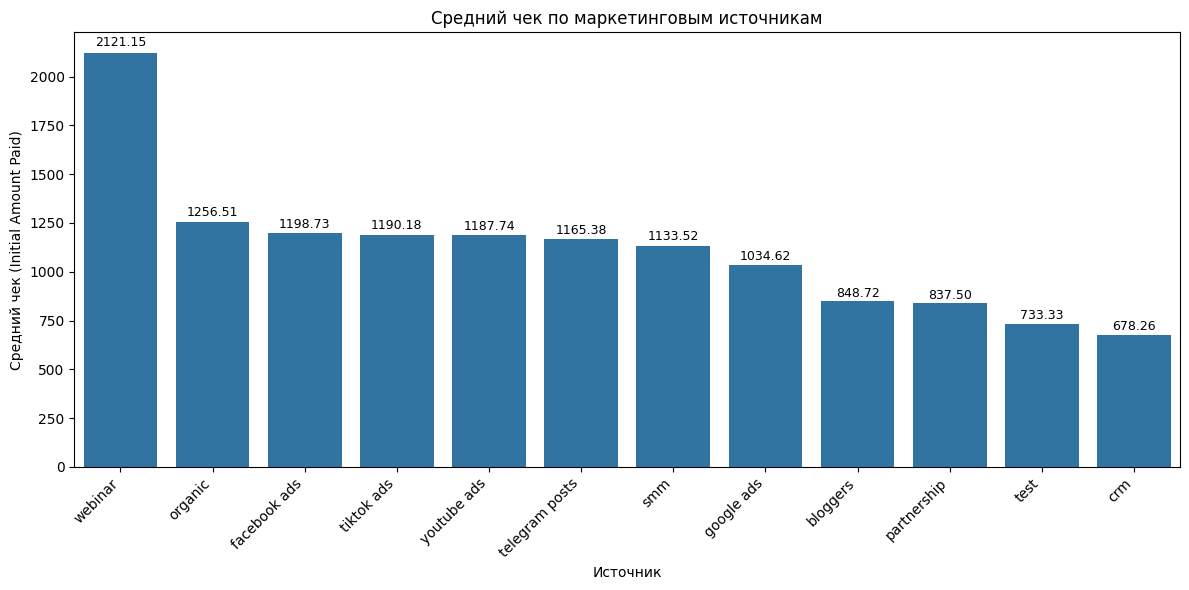

In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Фильтруем только успешные сделки (где был платеж)
successful_deals = deals_df[deals_df['Stage'] == 'Payment Done']

# Средний чек по источникам
avg_check_source = successful_deals.groupby('Source')['Initial Amount Paid'].mean().reset_index()

plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=avg_check_source.sort_values('Initial Amount Paid', ascending=False),
    x='Source',
    y='Initial Amount Paid'
)
plt.title('Средний чек по маркетинговым источникам')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Средний чек (Initial Amount Paid)')
plt.xlabel('Источник')

# Добавляем подписи значений на столбиках
for p in barplot.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height
    plt.text(x, y + 0.01 * height, f'{height:.2f}', ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()